# Random Decision Forest 
### Author: Frederik Bussler
Built from Scikit-Learn, predicts whether a game on IGN will be editors choice, with around 99.3% accuracy. The dataset is from https://www.kaggle.com/egrinstein/20-years-of-games/version/2#. Note: some data cleaning done, updated version uploaded.

Random Forest (rf) is flexible and easy to use, producing high accuracy and robust models with parameter tuning and feature selection. Simply put, rf generates several decision trees and combines them in order to create more accurate predictions.

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import seaborn as sns # for heatmap confusion matrix
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
fullData = pd.read_csv('ign.csv')
fullData.columns = ['score_phrase', 'title', 'platform', 'score', 'genre', 'editors_choice', 'release_year', 'release_month', 'release_day']

In [45]:
fullData.head(5)

,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,PlayStation 3,8.5,Sports,N,2012,9,11


In [46]:
target_col = ["editors_choice"]
cat_cols = ['score_phrase', 'title', 'platform', 'genre'] # these are the cols that are not cat that should be (cat)

In [47]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))
#Target variable is also a categorical so convert it
fullData["editors_choice"] = number.fit_transform(fullData["editors_choice"].astype('str'))
fullData['is_train'] = np.random.uniform(0, 1, len(fullData)) <= .7
Train, Validate = fullData[fullData['is_train']==True], fullData[fullData['is_train']==False]

In [48]:
fullData.head(5)

,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month,release_day,is_train
0,0,5684,35,9.0,63,1,2012,9,12,True
1,0,5685,35,9.0,63,1,2012,9,12,False
2,5,9764,56,8.5,68,0,2012,9,12,False
3,5,7050,54,8.5,93,0,2012,9,11,False
4,5,7050,32,8.5,93,0,2012,9,11,True


In [49]:
features=list(set(list(fullData.columns))-set(target_col))

In [50]:
x_train = Train[list(features)].values
y_train = Train["editors_choice"].values
x_validate = Validate[list(features)].values
y_validate = Validate["editors_choice"].values
x_test = fullData[list(features)].values

In [51]:
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [52]:
status = rf.predict_proba(x_validate)

In [53]:
fullData.head(5) # these are the encoded values

,score_phrase,title,platform,score,genre,editors_choice,release_year,release_month,release_day,is_train
0,0,5684,35,9.0,63,1,2012,9,12,True
1,0,5685,35,9.0,63,1,2012,9,12,False
2,5,9764,56,8.5,68,0,2012,9,12,False
3,5,7050,54,8.5,93,0,2012,9,11,False
4,5,7050,32,8.5,93,0,2012,9,11,True


In [54]:
fpr, tpr, _ = roc_curve(y_validate, status[:,1])

In [55]:
status = rf.predict_proba(x_validate)
fpr, tpr, _ = roc_curve(y_validate, status[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

final_status = rf.predict_proba(x_test)
fullData["editors_choice"]=final_status[:]

0.992838000334


# Area under ROC curve over 99%

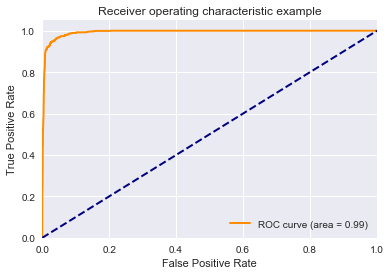

In [56]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()